In [101]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning up the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [102]:
job_titles = ['Data Analyst']
df_ind = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))].copy()
df_ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [103]:
df_ind['job_posted_month_no'] = df_ind['job_posted_date'].dt.month
df_ind_exp = df_ind.explode('job_skills')

In [104]:
df_ind_pivot = df_ind_exp.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_ind_pivot.loc['total'] = df_ind_pivot.sum()
df_ind_pivot = df_ind_pivot[df_ind_pivot.loc['total'].sort_values(ascending=False).index]
df_ind_pivot = df_ind_pivot.drop('total')

In [105]:
df_job_postings = df_ind.groupby('job_posted_month_no').size()

In [106]:
df_ind_pivot = df_ind_pivot.div(df_job_postings/100,axis=0)
df_ind_pivot = df_ind_pivot.map(lambda x: int(x))
df_ind_pivot


job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,48,34,34,25,15,14,20,7,5,6,...,0,0,0,0,0,0,0,0,0,0
2,48,34,36,26,17,15,18,6,7,5,...,0,0,0,0,0,0,0,0,0,0
3,54,35,32,29,18,13,14,10,9,6,...,0,0,0,0,0,0,0,0,0,0
4,48,34,33,23,19,13,12,9,7,6,...,0,0,0,0,0,0,0,0,0,0
5,55,36,38,25,21,15,10,11,7,6,...,0,0,0,0,0,0,0,0,0,0
6,52,40,31,31,20,20,20,10,8,6,...,0,0,0,0,0,0,0,0,0,0
7,53,35,38,27,20,14,17,8,6,6,...,0,0,0,0,0,0,0,0,0,0
8,51,34,31,24,20,18,15,8,10,6,...,0,0,0,0,0,0,0,0,0,0
9,54,36,36,30,26,15,14,5,6,4,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_ind_pivot = df_ind_pivot.reset_index()

In [108]:
df_ind_pivot['month'] = df_ind_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_ind_pivot = df_ind_pivot.set_index('month')
df_ind_pivot = df_ind_pivot.drop(columns='job_posted_month_no')
df_ind_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,ringcentral,rshiny,suse,ubuntu,twilio,typescript,vue.js,unreal,wrike,workfront
month,,,,,,,,,,,,,,,,,,,,,
Jan,48,34,34,25,15,14,20,7,5,6,...,0,0,0,0,0,0,0,0,0,0
Feb,48,34,36,26,17,15,18,6,7,5,...,0,0,0,0,0,0,0,0,0,0
Mar,54,35,32,29,18,13,14,10,9,6,...,0,0,0,0,0,0,0,0,0,0
Apr,48,34,33,23,19,13,12,9,7,6,...,0,0,0,0,0,0,0,0,0,0
May,55,36,38,25,21,15,10,11,7,6,...,0,0,0,0,0,0,0,0,0,0
Jun,52,40,31,31,20,20,20,10,8,6,...,0,0,0,0,0,0,0,0,0,0
Jul,53,35,38,27,20,14,17,8,6,6,...,0,0,0,0,0,0,0,0,0,0
Aug,51,34,31,24,20,18,15,8,10,6,...,0,0,0,0,0,0,0,0,0,0
Sep,54,36,36,30,26,15,14,5,6,4,...,0,0,0,0,0,0,0,0,0,0


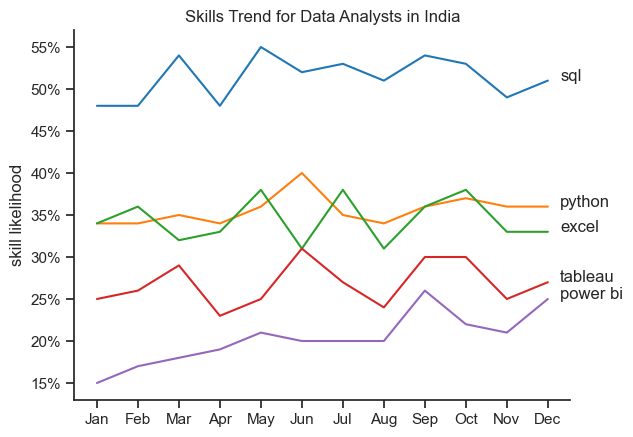

In [116]:
df_plot = df_ind_pivot.iloc[:,:5]
sns.set_theme(style='ticks')
sns.lineplot(df_plot,dashes=False,palette='tab10')
sns.despine()

plt.title('Skills Trend for Data Analysts in India')
plt.xlabel('')
plt.ylabel('skill likelihood')
plt.legend().remove()


ax = plt.gca()
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))




for i in range(5):
    plt.text(11.3, df_ind_pivot.iloc[-1, i], df_plot.columns[i])
